# Ceneo Analyzer

## Loading libraries

In [2]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Listing codes for all products for which opinions have been extracted

In [3]:
if os.path.exists('opinions'):
    print(*[filename.split('.')[0] for filename in os.listdir('opinions')], sep='\n')


44958016


## Specifying opinions about which product are to be analyzed

In [4]:
product_id = input("Enter the Ceneo.pl product ID")

## 

## Importing opinions from JSON file to pandas.Dataframe object

In [5]:
opinions = pd.read_json(f'opinions/{product_id}.json' )
opinions.score = opinions.score.apply(lambda v: round(v * 5,1))

## Basic statistic

In [6]:
MAX_SCORE = 5
opinions_count = opinions.index.size
pros_count = opinions.pros.apply(lambda p: None if not p else p).count()
cons_count = opinions.cons.apply(lambda p: None if not p else p).count()
avg_score = opinions.score.mean()

In [7]:
print(opinions_count)
print(pros_count)
print(cons_count)
print(avg_score)

42
12
9
3.5714285714285716


# Basic charts


## Score histogram


[Text(0, 0, ''),
 Text(0, 0, '6'),
 Text(0, 0, ''),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '2'),
 Text(0, 0, '17')]

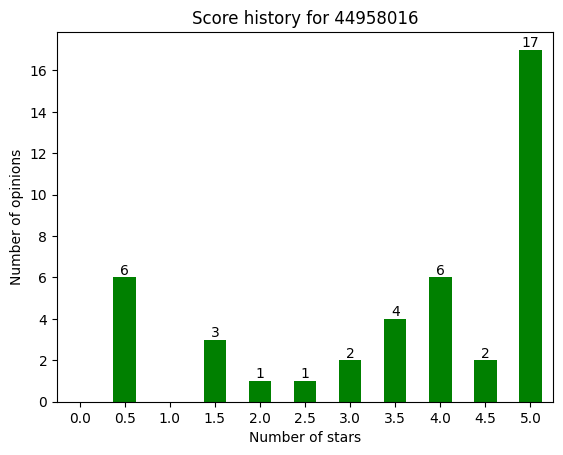

In [8]:
score_distribution = opinions.score.value_counts().reindex(np.arange(0, 5.5, 0.5))
fig, ax = plt.subplots()
score_distribution.plot.bar(color='green')
plt.xlabel('Number of stars')
plt.ylabel('Number of opinions')
plt.title(f"Score history for {product_id}")
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], label_type='edge', fmt= lambda l: int(l) if l else '')

### Recommendations shares

ValueError: Invalid format specifier '1.1f%' for object of type 'int'

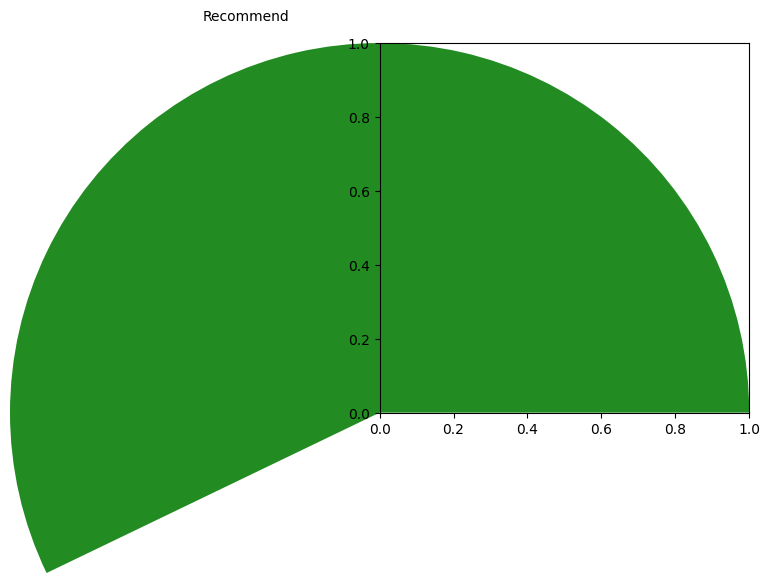

In [9]:
recommendation_distribution =opinions.recomendation.value_counts(dropna=False).reindex([True, False, np.nan], fill_value=0)
recommendation_distribution.plot.pie(
    labels = ['Recommend', 'Not recommend','No info'],
    label ='',
    colors = ['forestgreen', 'crimson', 'silver'],
    autopct = lambda l: '{:1.1f%}'.format(1) if l else ''
)
plt.title(f'Recommendations shares for {product_id}')